In [1]:
!pip install -U albumentations opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.4/606.4 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [63]:
# ライブラリのインストール
import albumentations as A
import cv2

# データ拡張パイプラインの定義
transform = A.Compose([
    A.HorizontalFlip(p=0.9),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='coco', label_fields=['class_labels']))

In [54]:
import cv2
image = cv2.imread("/content/dog.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

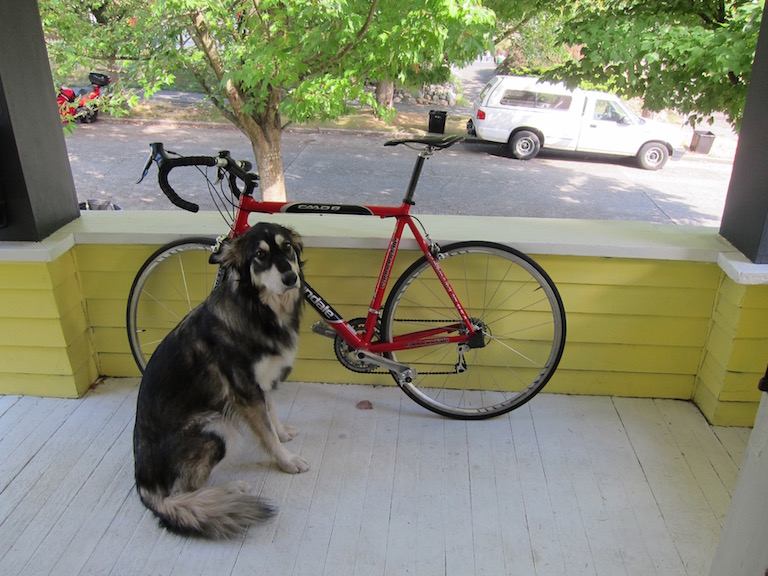

In [55]:
import cv2
from PIL import Image
from IPython.display import display

pil_img = Image.fromarray(image)
display(pil_img)

In [56]:
# 犬のバウンディングボックス
pascalvoc_bbox = [126, 225, 313, 538]

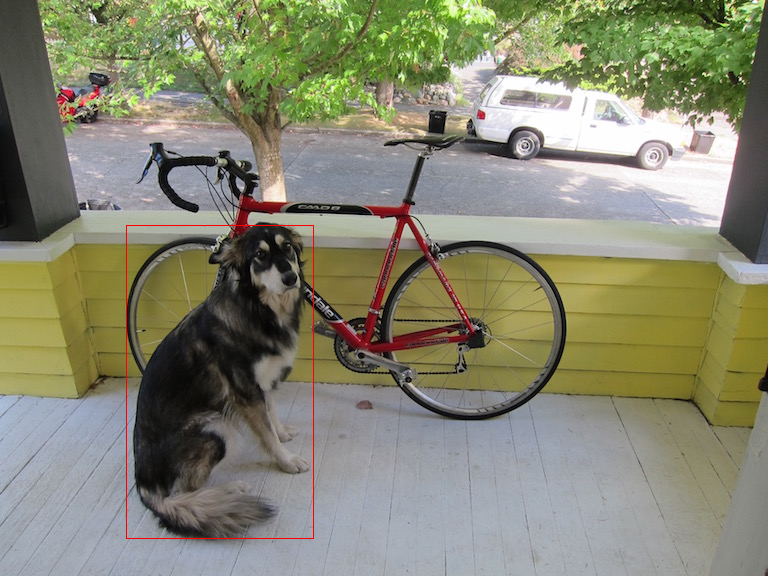

In [57]:
import cv2
import copy

bbox_image = copy.deepcopy(image)
cv2.rectangle(image, (pascalvoc_bbox[0], pascalvoc_bbox[1]), (pascalvoc_bbox[2], pascalvoc_bbox[3]), (255, 0, 0))
pil_img = Image.fromarray(image)
display(pil_img)

In [64]:
# 犬のバウンディングボックスをCOCO形式に変換
coco_bboxes = [
    [pascalvoc_bbox[0], pascalvoc_bbox[1], pascalvoc_bbox[2]-pascalvoc_bbox[0], pascalvoc_bbox[3]-pascalvoc_bbox[1]]
]
# クラスラベル
class_labels = ['dog']

# データ拡張
transformed = transform(image=image, bboxes=coco_bboxes, class_labels=class_labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['class_labels']
print('bboxes:',transformed_bboxes)
print('class_labels:',transformed_class_labels)

bboxes: [[454.9999694824219, 225.0, 187.00003051757812, 313.0]]
class_labels: ['dog']


[454, 225, 641, 538]


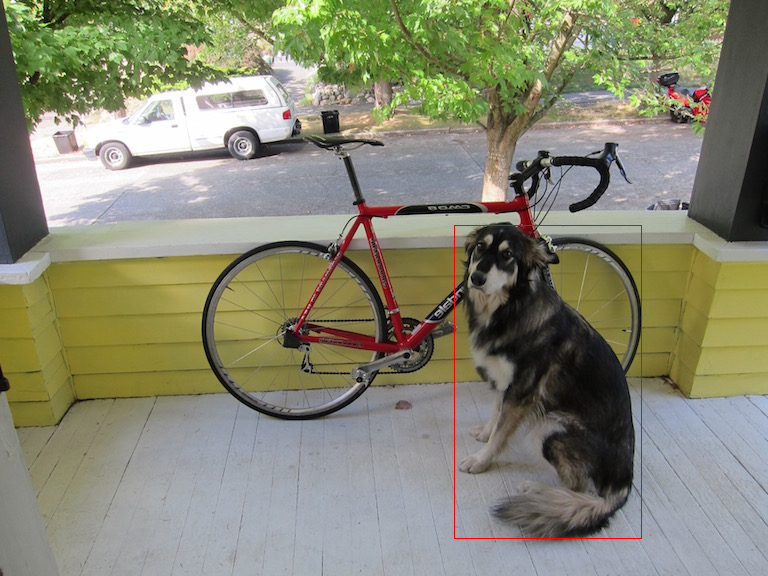

In [65]:
import cv2
coco_bbox = transformed_bboxes[0]
bbox = list(map(int, coco_bbox))
trans_pascalvoc_bbox = [bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]]
print(trans_pascalvoc_bbox)
cv2.rectangle(transformed_image, (trans_pascalvoc_bbox[0], trans_pascalvoc_bbox[1]), (trans_pascalvoc_bbox[2], trans_pascalvoc_bbox[3]), (255, 0, 0))

pil_img = Image.fromarray(transformed_image)
display(pil_img)